# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

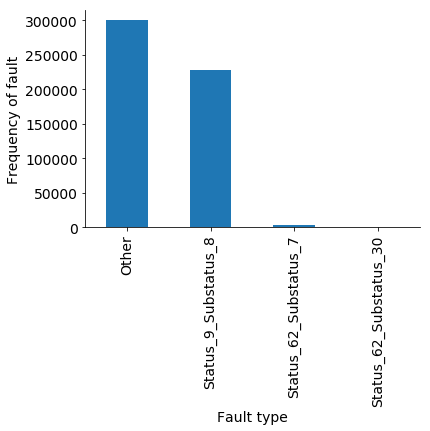

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [5]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

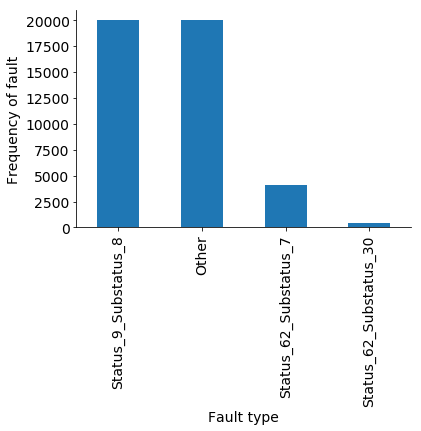

<Figure size 1440x1152 with 0 Axes>

In [6]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [7]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,23-09-2019 00:29:00,1.9,10.6,19.699999,109.0,1537.0,25.0,41.0,29.0,13.0,...,52.0,25.0,45.0,11.0,31.0,34.0,69.0,1.00,110.900002,Other
1,11-09-2018 05:32:00,0.0,7.7,16.150000,138.0,600.0,23.0,36.0,36.0,24.0,...,38.0,33.0,44.0,13.0,22.0,27.0,46.0,1.00,138.000000,Other
2,27-06-2019 12:56:00,-3.8,7.9,12.070000,264.0,0.0,25.0,31.0,30.0,23.0,...,66.0,37.0,45.0,13.0,19.0,24.0,39.0,17.49,260.200012,Status_9_Substatus_8
3,10-08-2018 13:20:00,4.8,7.1,11.790000,48.0,0.0,23.0,29.0,30.0,26.0,...,71.0,38.0,45.0,13.0,20.0,25.0,40.0,19.34,52.799999,Status_9_Substatus_8
4,02-11-2017 23:51:00,6.2,17.1,20.959999,243.0,2369.0,28.0,43.0,25.0,15.0,...,59.0,19.0,34.0,9.0,32.0,31.0,63.0,11.30,203.100006,Other


In [8]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [9]:
y.value_counts()

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## Split into training and test

In [10]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [11]:
columns_for_data = X_train.columns

In [12]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [13]:
y_test.value_counts()

Status_9_Substatus_8      6600
Other                     6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[0.98606061 0.         0.00272727 0.01121212]
 [0.28346457 0.68503937 0.         0.03149606]
 [0.00147929 0.         0.99852071 0.        ]
 [0.01287879 0.         0.         0.98712121]]


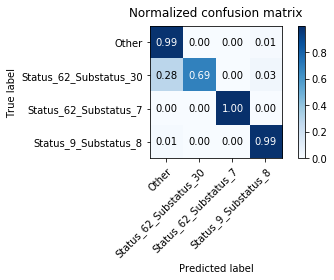

Total Accuracy 		0.985

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.981 		 0.986 		 0.984
Status_62_Substatus_30    	 1.000 		 0.685 		 0.813
Status_62_Substatus_7     	 0.987 		 0.999 		 0.993
Status_9_Substatus_8      	 0.988 		 0.987 		 0.988


In [14]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [15]:
rf.head()

,importance
ActivePower,0.152066
Log-T-Raw-Rectifier1HeatSink,0.079679
Log-T-Raw-TransformerTemperature,0.073990
Log-T-Raw-Rotor1Temperature,0.056063
Log-T-Raw-Rotor2Temperature,0.054508


## Scale dataset for SVM

In [25]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()


(29802, 34)
(14679, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.492774,0.188525,0.579219,0.426184,0.145417,0.493151,0.588235,0.350649,0.588235,0.607143,...,0.597826,0.592593,0.616667,0.489362,0.20,0.448718,0.187500,0.292929,0.000000,0.567691
1,0.512043,0.117486,0.507514,0.303621,0.000000,0.698630,0.682353,0.363636,0.682353,0.690476,...,0.815217,0.888889,0.783333,0.478723,0.60,0.615385,0.479167,0.383838,0.068018,0.490449
2,0.458203,0.084699,0.343066,0.479109,0.017917,0.657534,0.670588,0.344156,0.635294,0.654762,...,0.532609,0.604938,0.666667,0.329787,0.66,0.628205,0.520833,0.383838,0.000000,0.581811
3,0.468121,0.530055,0.910691,0.796657,0.830000,0.780822,0.776471,0.402597,0.552941,0.595238,...,0.663043,0.641975,0.400000,0.319149,0.46,0.743590,0.604167,0.727273,0.017894,0.825789
4,0.472372,0.423497,0.882353,0.409471,0.979583,0.630137,0.729412,0.266234,0.494118,0.523810,...,0.630435,0.703704,0.366667,0.340426,0.48,0.730769,0.666667,0.858586,0.053142,0.540282


## SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

## SVM method

### BALANCED SVM

In [ ]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

Loading...
Training...


### UNBALANCED SVM

In [ ]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
y1 = pd.DataFrame(X_train_scaled_smote)
y1[0].value_counts()

### SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

In [ ]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [ ]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

In [ ]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

In [18]:
# Remove the features from the random forest model called rf
rf_df = pd.DataFrame(rf)
rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features


,Selected features for decision tree
0,ActivePower
1,Log-T-Raw-Rectifier1HeatSink
2,Log-T-Raw-TransformerTemperature
3,Log-T-Raw-Rotor1Temperature
4,Log-T-Raw-Rotor2Temperature
5,Log-T-Raw-Rectifier2HeatSink


In [19]:


shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])

    
shorter_feature_names

['ActivePower']
['', 'Rectifier1HeatSink']
['', 'TransformerTemperature']
['', 'Rotor1Temperature']
['', 'Rotor2Temperature']
['', 'Rectifier2HeatSink']


['ActivePower',
 'Rectifier1HeatSink',
 'TransformerTemperature',
 'Rotor1Temperature',
 'Rotor2Temperature',
 'Rectifier2HeatSink']

In [20]:
import numpy as np

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled_smote))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled_smote))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()




,ActivePower,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-TransformerTemperature,Log-T-Raw-Rotor1Temperature,Log-T-Raw-Rotor2Temperature,Log-T-Raw-Rectifier2HeatSink
0,0.000000,0.771739,0.363636,0.198113,0.189573,0.876543
1,0.000000,0.782609,0.212121,0.169811,0.156398,0.827160
2,0.010417,0.554348,0.373737,0.188679,0.184834,0.617284
3,0.067083,0.543478,0.575758,0.122642,0.369668,0.679012
4,0.985833,0.695652,0.404040,0.391509,0.383886,0.765432


In [21]:
col_rename_dict = {i:j for i,j in zip(X_test_scaled_removed.columns,shorter_feature_names)}
X_test_scaled_removed.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_test_scaled_removed.head()
                

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,ActivePower,Rectifier1HeatSink,TransformerTemperature,Rotor1Temperature,Rotor2Temperature,Rectifier2HeatSink
0,0.000000,0.771739,0.363636,0.198113,0.189573,0.876543
1,0.000000,0.782609,0.212121,0.169811,0.156398,0.827160
2,0.010417,0.554348,0.373737,0.188679,0.184834,0.617284
3,0.067083,0.543478,0.575758,0.122642,0.369668,0.679012
4,0.985833,0.695652,0.404040,0.391509,0.383886,0.765432


Loading DT..
Training DT...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.56939394 0.37106061 0.04393939 0.01560606]
 [0.33560606 0.64227273 0.0180303  0.00409091]
 [0.16439394 0.         0.79378788 0.04181818]
 [0.10106061 0.38015152 0.01030303 0.50848485]]


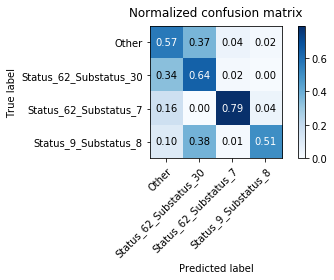

Plotting Performance Measure...
Total Accuracy 		0.628

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.486 		 0.569 		 0.525
Status_62_Substatus_30    	 0.461 		 0.642 		 0.537
Status_62_Substatus_7     	 0.917 		 0.794 		 0.851
Status_9_Substatus_8      	 0.892 		 0.508 		 0.648
Loading DT..
Training DT...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.         0.94045455 0.04393939 0.01560606]
 [0.         0.97787879 0.0180303  0.00409091]
 [0.         0.16439394 0.79378788 0.04181818]
 [0.         0.48121212 0.01030303 0.50848485]]


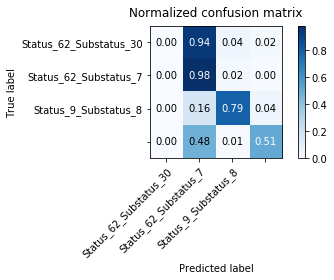

Plotting Performance Measure...
Total Accuracy 		0.570

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Status_62_Substatus_30    	 0.381 		 0.978 		 0.549
Status_62_Substatus_7     	 0.917 		 0.794 		 0.851
Status_9_Substatus_8      	 0.892 		 0.508 		 0.648


In [22]:
# Train DT on these features and print it out:
dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

In [23]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_test_scaled_removed.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [24]:
save_tree(dt_depth2,"depth2")
save_tree(dt_depth3,"depth3")

In [5]:
import os 
dir_path = os.path.dirname(os.path.realpath("run_models_stian.ipynb"))

In [6]:
dir_path

'/Users/stianismar/Dropbox/gitProsjekter/OLD_project-thesis_OLD/project-thesis/TE/models'